# Seattle Car Collision Data Science Project

## The goal of this project is to help XYZ Car Insurance LLC. reduce the number of severe car collisions in Seattle
### Background: 
XYZ Car Insurance  wants to encourage better driving practices among its customers to reduce the number of severe of crashes (those with serious injuries) and thus reduce their payout costs. They need to know what types of driver controllable factors are leading to severe crashes. They are willing to offer incentives for driver behaviors which reduce the likelihood of severe crashes. They may also offer courses on safer driving practices which if taken by a customer would lead to an incentive.

### The dataset can be found here: https://opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv

General information about the dataset can be found here: https://hub.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0

During the initial data understanding phase seven key features were identified as promising to help predict accident severity and allow for mitigation efforts by XYZ. 
1. Speeding
2. Under the influence (drugs)
3. Inattention 
4. Date/time of accident
5. Lighting conditions
6. Road conditions

Some of these features are directly controllable by the driver, such as 'speeding' or 'under the influence'. Others are indirect features that the driver can be aware of such as 'lighting condition' or 'time'. The last feature, 'collision type' will be used to help determine which types of cars are safest.

# Data Understanding
* Import Libraries
* Load data set
* Initial dataset prep (del cols, makes features binary, deal with null values)

In [159]:
#!conda remove seaborn
#!conda install -c anaconda seaborn
#print("done")
#!pip install dexplot

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
print("Import libraries successful!")

Import libraries successful!


# Create dataframe to use 

In [2]:
#Load csv into dataframe 'df' from URL source. Takes about 25 seconds
InitialFrame = pd.read_csv(filepath_or_buffer = "https://opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv")

#Check that there is now data inside of the dataframe 'df'.
if InitialFrame is None: 
    print("Null df, load error")
else:
    print("Load successful!")

Load successful!


In [3]:
#Visual inspecton of the data
InitialFrame.head(2)
InitialFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221738 entries, 0 to 221737
Data columns (total 40 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                214260 non-null  float64
 1   Y                214260 non-null  float64
 2   OBJECTID         221738 non-null  int64  
 3   INCKEY           221738 non-null  int64  
 4   COLDETKEY        221738 non-null  int64  
 5   REPORTNO         221738 non-null  object 
 6   STATUS           221738 non-null  object 
 7   ADDRTYPE         218024 non-null  object 
 8   INTKEY           72027 non-null   float64
 9   LOCATION         217145 non-null  object 
 10  EXCEPTRSNCODE    101335 non-null  object 
 11  EXCEPTRSNDESC    11785 non-null   object 
 12  SEVERITYCODE     221737 non-null  object 
 13  SEVERITYDESC     221738 non-null  object 
 14  COLLISIONTYPE    195287 non-null  object 
 15  PERSONCOUNT      221738 non-null  int64  
 16  PEDCOUNT         221738 non-null  int6

# ---------------

In [5]:
#Since we're only interested in a 7 features we'll pull those out
cols_to_keep = ['SEVERITYCODE','SEVERITYDESC','INATTENTIONIND',
                'UNDERINFL','WEATHER','LIGHTCOND','ROADCOND','SPEEDING','FATALITIES','PEDCOUNT']

df = InitialFrame[cols_to_keep]

#df1 = InitialFrame[['SEVERITYCODE','SEVERITYDESC','FATALITIES','PEDCOUNT','PEDCYLCOUNT']]

In [6]:
df.info() #--> Now there are only 9 columns to work with
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221738 entries, 0 to 221737
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   SEVERITYCODE    221737 non-null  object
 1   SEVERITYDESC    221738 non-null  object
 2   INATTENTIONIND  30188 non-null   object
 3   UNDERINFL       195307 non-null  object
 4   WEATHER         195097 non-null  object
 5   LIGHTCOND       195008 non-null  object
 6   ROADCOND        195178 non-null  object
 7   SPEEDING        9936 non-null    object
 8   FATALITIES      221738 non-null  int64 
 9   PEDCOUNT        221738 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 16.9+ MB


,SEVERITYCODE,SEVERITYDESC,INATTENTIONIND,UNDERINFL,WEATHER,LIGHTCOND,ROADCOND,SPEEDING,FATALITIES,PEDCOUNT
0,1,Property Damage Only Collision,NaN,N,Clear,Daylight,Dry,NaN,0,0
1,1,Property Damage Only Collision,Y,0,Raining,Dusk,Wet,NaN,0,0
2,2,Injury Collision,NaN,N,Clear,Dark - Street Lights On,Dry,NaN,0,0
3,2,Injury Collision,NaN,N,Raining,Dark - Street Lights On,Wet,NaN,0,1
4,2,Injury Collision,NaN,0,Clear,Dark - Street Lights On,Ice,Y,0,0


In [99]:
##Initially used this to check for null values and print a list of columns that had them and the counts.

#missing_data = df.isnull()

#for column in missing_data.columns.tolist():
 #   print(column)
  #  print (missing_data[column].value_counts())
   # print("")  

# The Plan

We see from the above examination of the data frame that there are a wide variety of data types and entires. Text descriptions, NaN, Y/N, and integers. I'm am going to standardize all of these entries into binary values so that they work well for **classification** algorithms. The outline of the code will be as follows:

1. Examine the target feature
2. Examine the prediction features
3. Clean and prepare the code (make features binary, drop NaN, etc)
4. Visualize prediction features
5. Machine Learning
6. Show outcomes

# 1. Examine Target Feature

In [7]:
#Get an idea of the severity of accidents
severity_table = df.groupby(by='SEVERITYCODE' , axis=0)['SEVERITYDESC'].value_counts(dropna=False, sort=False)
severity_table


SEVERITYCODE  SEVERITYDESC                  
0             Unknown                            21656
1             Property Damage Only Collision    137776
2             Injury Collision                   58842
2b            Serious Injury Collision            3111
3             Fatality Collision                   352
Name: SEVERITYDESC, dtype: int64

In [8]:
severity_frame = severity_table.to_frame()
severity_frameP = round(severity_frame/severity_frame.sum(),4)*100
severity_frameP.rename(columns = {"SEVERITYDESC":"Severity Distribution"}, inplace=True)
severity_frameP

,,Severity Distribution
SEVERITYCODE,SEVERITYDESC,
0,Unknown,9.77
1,Property Damage Only Collision,62.13
2,Injury Collision,26.54
2b,Serious Injury Collision,1.40
3,Fatality Collision,0.16


* (1) As can be seen above 62% of collisions result in property damage only. 
* (2) 26.5% result in injury.
* (2b) 1.4% result in serious injury.
* (3) 0.15% result in a death.
* (0) 10% of cases are unknown.

Less see a visualization below

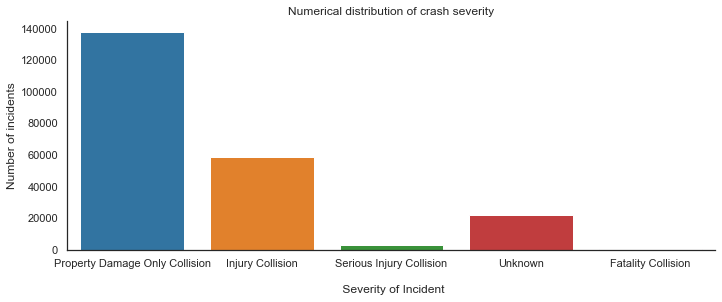

In [9]:
sns.set(font_scale=1)
sns.set_style(style='white')
colors=sns.color_palette('tab10')

ax = sns.catplot(x='SEVERITYDESC',kind='count',data=df, height=4, aspect=2.5, palette=colors )
ax.set(xlabel = "\n Severity of Incident",ylabel="Number of incidents", title = "Numerical distribution of crash severity")

We can see that the grand majority of collisions result in property damage only and almost none (by comparison) result in fatalities. Very few result in serious injury. Because of the proportionaly small quantities of serious injury and fatality collision data, when I prepare the data I will include all injury collision categories into one group.

# 2. Feature examination - Are these features viable?

The data and graphs were intentionally left messy in this section. This is to show the process of discovering what needs to be cleaned and how. If you're not interested in seeing this process go to step 3 - data cleaning and preparation.

## Speeding

In [103]:
speed_table = df.groupby(by='SPEEDING' , axis=0)['SEVERITYDESC'].value_counts(dropna=False)
speed_table

SPEEDING  SEVERITYDESC                  
Y         Property Damage Only Collision    5890
          Injury Collision                  3578
          Serious Injury Collision           377
          Fatality Collision                  90
          Unknown                              1
Name: SEVERITYDESC, dtype: int64

In [104]:
speed_frame = speed_table.to_frame()
speed_frameP = round(speed_frame/speed_frame.sum(),4)*100
speed_frameP.rename(columns = {"SEVERITYDESC":"Speeding Severity Distribution"}, inplace=True)
speed_frameP

Speeding Severity Distribution
SPEEDING SEVERITYDESC                                                  
Y        Property Damage Only Collision                           59.28
         Injury Collision                                         36.01
         Serious Injury Collision                                  3.79
         Fatality Collision                                        0.91
         Unknown                                                   0.01

In [105]:
#Create a new dataframe which show a direct comparison of severity distirbution with and without speeding

#Adjust the severity frame so I can create a new one with it and the speed frame
severity_frameP = severity_frameP.droplevel("SEVERITYCODE")  #Drop one of the index levels
#Reorder the the severity frame so it matches the order of the speed frame
severity_frameP= severity_frameP.reindex(index = ['Property Damage Only Collision','Injury Collision',
                                                 'Serious Injury Collision','Fatality Collision','Unknown'] ) 

#Create a new frame showing both speed and severity
speed_severity_frame = severity_frameP
speed_severity_frame["Speed severity distirbution"] = speed_frameP["Speeding Severity Distribution"].values
speed_severity_frame

,Severity Distribution,Speed severity distirbution
SEVERITYDESC,,
Property Damage Only Collision,62.13,59.28
Injury Collision,26.54,36.01
Serious Injury Collision,1.40,3.79
Fatality Collision,0.16,0.91
Unknown,9.77,0.01


In [106]:
speed_severity_frame.to_clipboard(excel=True)

Based on the table above, we can see there is a correlation between speeding and the severity of an accident. Injuries, serious injuries, and fatalities make up a larger percentage of the distirbution when speeding is involved.

In [107]:
speed_severity_frame.reset_index(inplace=True) #This will push SEVERITYDESC into the columns so it can be used for graphing with seaborn.

speeding_bar_chart = pd.melt(speed_severity_frame, id_vars="SEVERITYDESC", var_name="Speeding", value_name="Distirbution") #I need the data in longform again
#bar_chart #Uncomment this if you wish to see the long form used for the graph below.


In [118]:
#speeding_bar_chart.drop(axis=0, labels=[9], inplace=True)   #Drop the unknown row.
speeding_bar_chart

,SEVERITYDESC,Speeding,Distirbution
0,Property Damage Only Collision,Severity Distribution,62.13
1,Injury Collision,Severity Distribution,26.54
2,Serious Injury Collision,Severity Distribution,1.40
3,Fatality Collision,Severity Distribution,0.16
4,Unknown,Severity Distribution,9.77
5,Property Damage Only Collision,Speed severity distirbution,59.28
6,Injury Collision,Speed severity distirbution,36.01
7,Serious Injury Collision,Speed severity distirbution,3.79
8,Fatality Collision,Speed severity distirbution,0.91


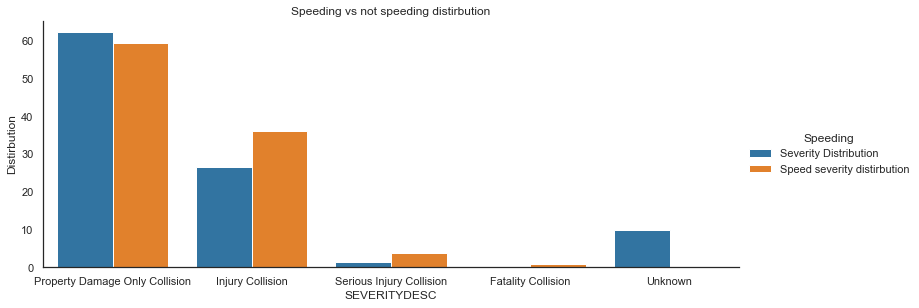

In [116]:
sns.set(font_scale=1)
sns.set_style(style='white')
colors=sns.color_palette('tab10')

ax = sns.catplot(x='SEVERITYDESC',y='Distirbution', hue='Speeding', kind='bar',data= speeding_bar_chart,height=4.25, aspect=2.5, palette=colors)
ax.set(title = "Speeding vs not speeding distirbution")
#I should figure out how to change the legend to be more helpful.

This is a visualization of the above table showing how there are more injuries when speeding is involved (orange speeding severity distirbution)

For preparation, I will change the NaN values to 0 and the 'Y' values to 1. Also note, only about 5% (9936) of values have speeding data filled out.

In [46]:
df[['SPEEDING']].info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221738 entries, 0 to 221737
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   SPEEDING  9936 non-null   object
dtypes: object(1)
memory usage: 1.7+ MB


## Inattention

In [13]:
inatt_table = df.groupby(by='SEVERITYDESC' , axis=0)['INATTENTIONIND'].value_counts(dropna=False)

inatt_tableP =df.groupby(by='SEVERITYDESC' , axis=0)['INATTENTIONIND'].value_counts(dropna=False, normalize=True)
inatt_table

SEVERITYDESC                    INATTENTIONIND
Fatality Collision              NaN                  336
                                Y                     16
Injury Collision                NaN                48441
                                Y                  10401
Property Damage Only Collision  NaN               118366
                                Y                  19410
Serious Injury Collision        NaN                 2750
                                Y                    361
Unknown                         NaN                21657
Name: INATTENTIONIND, dtype: int64

In [14]:
inatt_frame = inatt_tableP.to_frame()
inatt_frame = round(inatt_frame,4)

inatt_frame.rename(columns = {"INATTENTIONIND":"Proportion"}, inplace=True)
inatt_frame

Proportion
SEVERITYDESC                   INATTENTIONIND            
Fatality Collision             NaN                 0.9545
                               Y                   0.0455
Injury Collision               NaN                 0.8232
                               Y                   0.1768
Property Damage Only Collision NaN                 0.8591
                               Y                   0.1409
Serious Injury Collision       NaN                 0.8840
                               Y                   0.1160
Unknown                        NaN                 1.0000

In [17]:
inatt_frame.reset_index(inplace=True) #This will push SEVERITYDESC into the columns so it can be used for graphing with seaborn.
inatt_frame.drop(axis=0, labels=[8], inplace=True)
inatt_frame

,SEVERITYDESC,INATTENTIONIND,Proportion
0,Fatality Collision,NaN,0.9545
1,Fatality Collision,Y,0.0455
2,Injury Collision,NaN,0.8232
3,Injury Collision,Y,0.1768
4,Property Damage Only Collision,NaN,0.8591
5,Property Damage Only Collision,Y,0.1409
6,Serious Injury Collision,NaN,0.8840
7,Serious Injury Collision,Y,0.1160


## Under the influence

In [49]:
infl_table = df.groupby(by='SEVERITYDESC' , axis=0)['UNDERINFL'].value_counts(dropna=True)
infl_table

#Show the proportions of how UNDERINFL affects the severity description
infl_tableP =df.groupby(by='SEVERITYDESC' , axis=0)['UNDERINFL'].value_counts(dropna=True, normalize=True)
infl_tableP

SEVERITYDESC                    UNDERINFL
Fatality Collision              N            0.433628
                                0            0.292035
                                1            0.150442
                                Y            0.123894
Injury Collision                N            0.546392
                                0            0.392086
                                Y            0.033490
                                1            0.028032
Property Damage Only Collision  N            0.527970
                                0            0.430523
                                Y            0.023806
                                1            0.017701
Serious Injury Collision        N            0.479126
                                0            0.386497
                                Y            0.074364
                                1            0.060013
Unknown                         N            1.000000
Name: UNDERINFL, dtype: float64

In [50]:
infl_frame = infl_tableP.to_frame()
infl_frame = round(infl_frame,4)

infl_frame.rename(columns = {"UNDERINFL":"Proportion"}, inplace=True)
infl_frame

Proportion
SEVERITYDESC                   UNDERINFL            
Fatality Collision             N              0.4336
                               0              0.2920
                               1              0.1504
                               Y              0.1239
Injury Collision               N              0.5464
                               0              0.3921
                               Y              0.0335
                               1              0.0280
Property Damage Only Collision N              0.5280
                               0              0.4305
                               Y              0.0238
                               1              0.0177
Serious Injury Collision       N              0.4791
                               0              0.3865
                               Y              0.0744
                               1              0.0600
Unknown                        N              1.0000

In [51]:
infl_frame.reset_index(inplace=True) #This will push SEVERITYDESC into the columns so it can be used for graphing with seaborn.
infl_frame.drop(axis=0, labels=[8], inplace=True)
infl_frame
#infl_bar_chart = pd.melt(infl_frame, id_vars="SEVERITYDESC", var_name="Under Influence", value_name="Distirbution") #I need the data in longform again
#infl_bar_chart #Uncomment this if you wish to see the long form used for the graph below.

,SEVERITYDESC,UNDERINFL,Proportion
0,Fatality Collision,N,0.4336
1,Fatality Collision,0,0.2920
2,Fatality Collision,1,0.1504
3,Fatality Collision,Y,0.1239
4,Injury Collision,N,0.5464
5,Injury Collision,0,0.3921
6,Injury Collision,Y,0.0335
7,Injury Collision,1,0.0280
9,Property Damage Only Collision,0,0.4305
10,Property Damage Only Collision,Y,0.0238


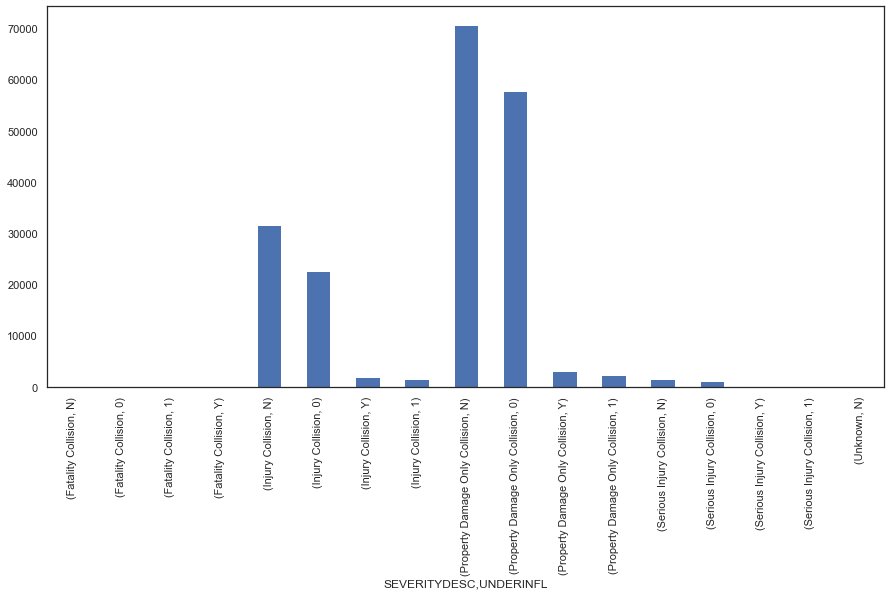

In [54]:
fig, ax = plt.subplots(figsize=(15,7))
infl_table.plot.bar(ax=ax)


As can be seen from the table and graph above I'll need to combine N & 0, and Y & 1 into one category. This will help clean things up and is a requirement for the machine learning process later. We'll examine this again once this is done.


In [55]:
roadcond_table = df.groupby(by='SEVERITYDESC' , axis=0)['ROADCOND'].value_counts(dropna=True)
roadcond_table

roadcond_tableP =df.groupby(by='SEVERITYDESC' , axis=0)['ROADCOND'].value_counts(dropna=True, normalize=True)
#roadcond_tableP


I'll drop entries with oil. I'll cobmine Wet,Ice,Snow/Slush,and Standing Water. 
* This will leave me with
* Ideal-dry
* Wet - wet, standing water
* winter - Ice, snow/slush

## Light conditions

In [56]:
lightcond_table = df.groupby(by='SEVERITYDESC' , axis=0)['LIGHTCOND'].value_counts(dropna=True)
lightcond_table

lightcond_tableP =df.groupby(by='SEVERITYDESC' , axis=0)['LIGHTCOND'].value_counts(dropna=True, normalize=True)
#lightcond_tableP

I'll need to combine all Dark categories into one, then I'll combine dawn and dusk into another category.

## Weather conditions

In [57]:
weathercond_table = df.groupby(by='SEVERITYDESC' , axis=0)['WEATHER'].value_counts(dropna=True)
weathercond_table

#weathercond_tableP =df.groupby(by='WEATHER' , axis=0)['SEVERITYDESC'].value_counts(dropna=True, normalize=True)
weathercond_table

SEVERITYDESC                    WEATHER                 
Fatality Collision              Clear                         227
                                Overcast                       53
                                Raining                        50
                                Fog/Smog/Smoke                  3
                                Other                           3
                                Partly Cloudy                   1
                                Severe Crosswind                1
                                Unknown                         1
Injury Collision                Clear                       36352
                                Raining                     11286
                                Overcast                     8853
                                Unknown                       816
                                Fog/Smog/Smoke                188
                                Snowing                       171
                   

This may not be a great feature for my purposes...Want I want to know is do inclimate weather conditions increase the probability of an accident?

## Pedestrian Count

In [58]:
ped_table = df.groupby(by='SEVERITYDESC' , axis=0)['PEDCOUNT'].value_counts(dropna=False, sort=False)
ped_frame = ped_table.to_frame()
ped_frame

PEDCOUNT
SEVERITYDESC                   PEDCOUNT          
Fatality Collision             0              215
                               1              129
                               2                5
                               3                1
                               4                2
Injury Collision               0            52527
                               1             6079
                               2              209
                               3               21
                               4                4
                               5                1
                               6                1
Property Damage Only Collision 0           137071
                               1              685
                               2               19
                               3                1
Serious Injury Collision       0             2193
                               1              868
                               2               41
                               3                5
                               4                3
                               5                1
Unknown                        0            21656
                               2                1

By quick examination we see that when a pedestrian is involved, injury or worse is more likely.

To prepare the data I will drop the unkown values (which is done for all features anyway) and combine all ped counts of 1 or greater into one category. So if pedcount >= 1 then pedcount = 1 else, pedcount =0. The later on I will combine the target feature into two categories making this even more binary.

# 3. Data Cleaning and Preparation

### Speeding Feature Prep
I will change these values to binary values. Nan will be set to 0. The reason for this is, in the data set either speeding
is indicated or it is left blank which I assume means they were not suspected/recorded as speeding.

In [19]:

df = df.astype( {'SPEEDING':str} ) #The values are initially numpy.float64

speed_conv_dict = { 'nan':int(0), 'Y':int(1) }  #without int(value) I'll get strings
df['SPEEDING'].replace(to_replace= speed_conv_dict ,value=None,inplace=True,regex=False) 

#df = df.astype( {'SPEEDING':'float64' } ) #Can't convert 1.0 straight to int must do float first
df = df.astype( {'SPEEDING':'int64' } )

df['SPEEDING'].value_counts()
#type(df['SPEEDING'].iloc[5])

0    211802
1      9936
Name: SPEEDING, dtype: int64

### Inattention
Here I am assuming that if inattention was not explicitly indicated then it wasn't suspected and will be set to 0

In [20]:
atten_conv_dict = { np.nan:int(0), 'Y':int(1) }  #without int(value) I'll get strings
df['INATTENTIONIND'].replace(to_replace= atten_conv_dict ,value=None,inplace=True,regex=False) 

#df = df.astype( {'SPEEDING':'float64' } ) #Can't convert 1.0 straight to int must do float first
df = df.astype( {'INATTENTIONIND':'int64' } )

df['INATTENTIONIND'].value_counts()

0    191550
1     30188
Name: INATTENTIONIND, dtype: int64

### UnderInfl Feature Prep
I will combine the '0/N' into just '0', and the '1/Y' into just '1'

In [21]:
#Values before combining
df['UNDERINFL'].value_counts()

N    104002
0     81676
Y      5399
1      4230
Name: UNDERINFL, dtype: int64

In [22]:
#Values after combining
infl_cond_dict = {"Y":"1", "N":"0"}

df['UNDERINFL'].replace(to_replace = infl_cond_dict,value=None,inplace=True)
#df = df.astype( {'UNDERINFL':'int64' } )

df['UNDERINFL'].value_counts()


0    185678
1      9629
Name: UNDERINFL, dtype: int64

### LightCond Feature Prep
Here we see 9 different values, I will combine all similar lighting conditions and drop other rows.

In [23]:
#Values before combining
df['LIGHTCOND'].value_counts()

Daylight                    119555
Dark - Street Lights On      50139
Unknown                      13533
Dusk                          6085
Dawn                          2609
Dark - No Street Lights       1580
Dark - Street Lights Off      1239
Other                          244
Dark - Unknown Lighting         24
Name: LIGHTCOND, dtype: int64

In [24]:
light_conversion_dict = {"Dark - No Street Lights": "Dark", "Dark - Street Lights Off":"Dark", "Dark - Unknown Lighting": "Dark",
                         "Dark - Street Lights On":"Dark", "Dusk":"Transitional","Dawn":"Transitional"}

df['LIGHTCOND'].replace(to_replace= light_conversion_dict,value=None,inplace=True,regex=False) 

df['LIGHTCOND'].value_counts()

Daylight        119555
Dark             52982
Unknown          13533
Transitional      8694
Other              244
Name: LIGHTCOND, dtype: int64

In [25]:
#Drop unwanted condition types for light

#checks each element of the Series as to whether the element value has the string 'Other' 
##as a substring. The result is a Series of Booleans ('light_drop_mask') indicating True or False 
###about the existence of a 'Other' substring.
light_drop_mask = df['LIGHTCOND'].str.contains("Other|Unknown", na=False)

#Apply the mask to the data frame, keep rows where "Other" is false/doesn't exist
df = df[light_drop_mask==False]
df.reset_index(drop=True, inplace=True)
df['LIGHTCOND'].value_counts()

Daylight        119555
Dark             52982
Transitional      8694
Name: LIGHTCOND, dtype: int64

### RoadCond Feature Prep

In [26]:
df['ROADCOND'].value_counts()

Dry               126522
Wet                48030
Unknown             4460
Ice                 1161
Snow/Slush           875
Other                116
Standing Water       112
Sand/Mud/Dirt         71
Oil                   63
Name: ROADCOND, dtype: int64

In [27]:
road_cond_dict = {"Standing Water":"Wet", "Ice":"Winter","Snow/Slush":"Winter"}

df['ROADCOND'].replace(to_replace=road_cond_dict, value=None, inplace=True)

df['ROADCOND'].value_counts()

Dry              126522
Wet               48142
Unknown            4460
Winter             2036
Other               116
Sand/Mud/Dirt        71
Oil                  63
Name: ROADCOND, dtype: int64

In [28]:
#Drop unwanted condition types for road: oil, sand/mud/dirt, and other.

road_drop_mask = df['ROADCOND'].str.contains("Other|Sand/Mud/Dirt|Oil|Unknown", na=False)


#Apply the mask to the data frame, keep rows where "Other" is false/doesn't exist
df = df[road_drop_mask==False]
df.reset_index(drop=True, inplace=True)
df['ROADCOND'].value_counts()

Dry       126522
Wet        48142
Winter      2036
Name: ROADCOND, dtype: int64

### Weather Feature Prep

In [29]:
#Just drop the weather column because it doesn't look promising for predictions
df.drop(labels='WEATHER', axis=1,inplace=True)

### Pedestrian Feature Prep

In [30]:
#turn PEDCOUNT into a binary feature. 1 means there was a pedestrian involved, 0 means there was not.
df.loc[df['PEDCOUNT'] > 0, ['PEDCOUNT']] = 1

df['PEDCOUNT'].value_counts()

0    195440
1      7811
Name: PEDCOUNT, dtype: int64

In [31]:
ped_table1 = df.groupby(by='SEVERITYDESC' , axis=0)['PEDCOUNT'].value_counts(dropna=False, sort=False, normalize=True)
ped_frame = round(ped_table1.to_frame(),4)
ped_frame

PEDCOUNT
SEVERITYDESC                   PEDCOUNT          
Fatality Collision             0           0.6086
                               1           0.3914
Injury Collision               0           0.8942
                               1           0.1058
Property Damage Only Collision 0           0.9944
                               1           0.0056
Serious Injury Collision       0           0.7078
                               1           0.2922
Unknown                        0           1.0000
                               1           0.0000

In [32]:
ped_frame.rename(columns={"PEDCOUNT":"Totals"}, inplace=True) #Rename the column to totals so we can reset index withou having two 'pedcount' columns
ped_frame.reset_index(inplace=True)    
ped_frame.drop(axis=0, labels=[8,9], inplace=True)  #Drop unknown values
ped_frame

,SEVERITYDESC,PEDCOUNT,Totals
0,Fatality Collision,0,0.6086
1,Fatality Collision,1,0.3914
2,Injury Collision,0,0.8942
3,Injury Collision,1,0.1058
4,Property Damage Only Collision,0,0.9944
5,Property Damage Only Collision,1,0.0056
6,Serious Injury Collision,0,0.7078
7,Serious Injury Collision,1,0.2922


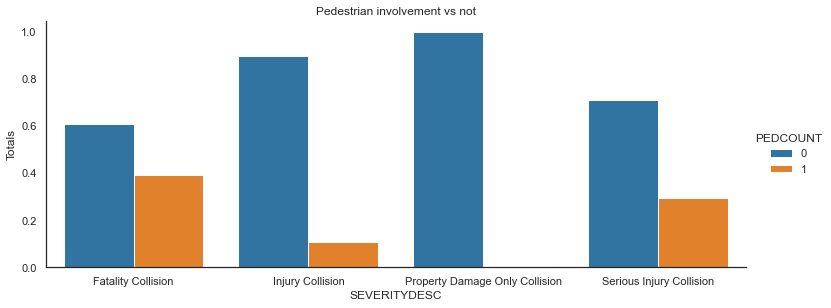

In [33]:
#Plots the data to show the affect of 'UNDERINFL' on 'SEVERITYDESC'

sns.set(font_scale=1)
sns.set_style(style='white')
colors=sns.color_palette('tab10')


ax = sns.catplot(x='SEVERITYDESC',y='Totals', hue='PEDCOUNT', kind='bar',data= ped_frame ,height=4.25, aspect=2.5, palette=colors)
ax.set(title = "Pedestrian involvement vs not")

In [34]:
df.head()

,SEVERITYCODE,SEVERITYDESC,INATTENTIONIND,UNDERINFL,LIGHTCOND,ROADCOND,SPEEDING,FATALITIES,PEDCOUNT
0,1,Property Damage Only Collision,0,0,Daylight,Dry,0,0,0
1,1,Property Damage Only Collision,1,0,Transitional,Wet,0,0,0
2,2,Injury Collision,0,0,Dark,Dry,0,0,0
3,2,Injury Collision,0,0,Dark,Wet,0,0,1
4,2,Injury Collision,0,0,Dark,Winter,1,0,0


### Drop NaN values from the features of interest

In [35]:
df.dropna(subset=["SEVERITYCODE","INATTENTIONIND","UNDERINFL","LIGHTCOND","ROADCOND","PEDCOUNT"],axis=0,inplace=True)
df.reset_index(drop=True, inplace=True)
df.head(10)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176506 entries, 0 to 176505
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   SEVERITYCODE    176506 non-null  object
 1   SEVERITYDESC    176506 non-null  object
 2   INATTENTIONIND  176506 non-null  int64 
 3   UNDERINFL       176506 non-null  object
 4   LIGHTCOND       176506 non-null  object
 5   ROADCOND        176506 non-null  object
 6   SPEEDING        176506 non-null  int64 
 7   FATALITIES      176506 non-null  int64 
 8   PEDCOUNT        176506 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 12.1+ MB


In [36]:
#Ensure there is no null or NaN data
missing_data = df.isnull()

for column in missing_data.columns.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

SEVERITYCODE
False    176506
Name: SEVERITYCODE, dtype: int64

SEVERITYDESC
False    176506
Name: SEVERITYDESC, dtype: int64

INATTENTIONIND
False    176506
Name: INATTENTIONIND, dtype: int64

UNDERINFL
False    176506
Name: UNDERINFL, dtype: int64

LIGHTCOND
False    176506
Name: LIGHTCOND, dtype: int64

ROADCOND
False    176506
Name: ROADCOND, dtype: int64

SPEEDING
False    176506
Name: SPEEDING, dtype: int64

FATALITIES
False    176506
Name: FATALITIES, dtype: int64

PEDCOUNT
False    176506
Name: PEDCOUNT, dtype: int64



In [37]:
df = df.astype({"UNDERINFL":"int64", "SEVERITYDESC": str})
df.dtypes

SEVERITYCODE      object
SEVERITYDESC      object
INATTENTIONIND     int64
UNDERINFL          int64
LIGHTCOND         object
ROADCOND          object
SPEEDING           int64
FATALITIES         int64
PEDCOUNT           int64
dtype: object

# More in depth feature examination and visualization

## Number of fatalities

In [75]:
#Create a fatality frame - ff
ff0 = df.query('FATALITIES > 0') #Create a dataframe where fatality count is greater 0
ff1 = df.query('FATALITIES > 1')  #Create a dataframe where fatality count is greater 1
ff0.head(1)


,SEVERITYCODE,SEVERITYDESC,INATTENTIONIND,UNDERINFL,LIGHTCOND,ROADCOND,SPEEDING,FATALITIES,PEDCOUNT
781,3,Fatality Collision,0,1,Dark,Wet,0,2,0


Text(0.5, 1.0, 'Speeding affect on fatality count')

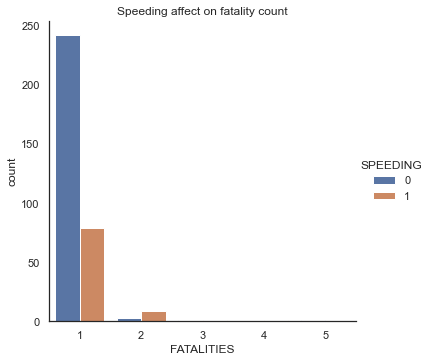

In [76]:
sns.catplot(x='FATALITIES',kind='count', hue='SPEEDING',data=ff0)
plt.title("Speeding affect on fatality count")

We see that speeding is not necessarily correlated with single fatality accidents, but there appears to be a positive correlation between speeding and accidents with 2 or greater fatalities. Lets look closer.

Text(0.5, 1.0, 'Speeding affect on fatality count')

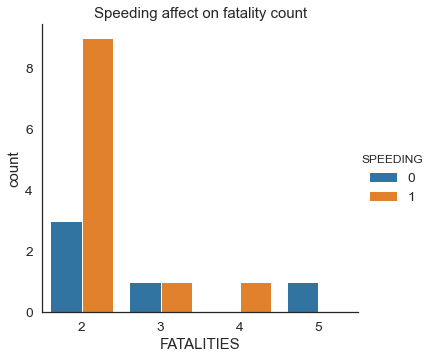

In [77]:
sns.set(font_scale=1.25)
sns.set_style(style='white')
colors=sns.color_palette('tab10')

sns.catplot(x='FATALITIES',kind='count', hue='SPEEDING',data=ff1, palette=colors)
plt.title("Speeding affect on fatality count")

We see a positive looking correlation between speeding and a greater number of fatalities but there is not enough data to support this as substantional (total data points < 30). 30 is a number often used in statistics for random sampling.

Text(0.5, 1.0, 'Inattention affect on fatality count')

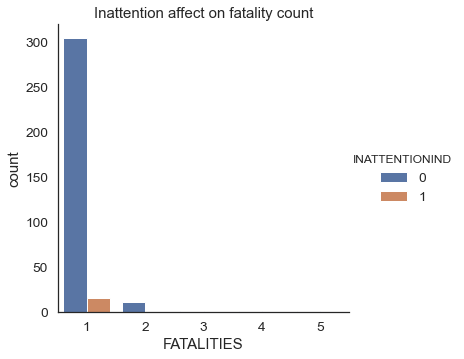

In [78]:
sns.set(font_scale=1.25)
sns.set_style(style='white')
colors=sns.color_palette('tab10')

sns.catplot(x='FATALITIES',kind='count', hue='INATTENTIONIND',data=ff0)
plt.title("Inattention affect on fatality count")

Text(0.5, 1.0, 'Underinfluence affect on fatality count')

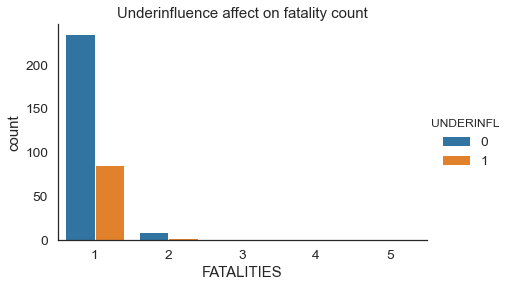

In [79]:

sns.set(font_scale=1.25)
sns.set_style(style='white')
colors=sns.color_palette('tab10')

ax = sns.catplot(x='FATALITIES',kind='count', hue='UNDERINFL',data=ff0, height=4, aspect=1.5, palette=colors)
plt.title("Underinfluence affect on fatality count")


## Inattention

In [38]:
#Create a usable data frame to create a bar graph:
inatt_tableP =df.groupby(by='SEVERITYDESC' , axis=0)['INATTENTIONIND'].value_counts(dropna=False, normalize=True)

inatt_frame = inatt_tableP.to_frame()
inatt_frame = round(inatt_frame,4)

inatt_frame.rename(columns = {"INATTENTIONIND":"Proportion"}, inplace=True)

inatt_frame.reset_index(inplace=True) #This will push SEVERITYDESC into the columns so it can be used for graphing with seaborn.
inatt_frame.drop(axis=0, labels=[8], inplace=True)
inatt_frame

,SEVERITYDESC,INATTENTIONIND,Proportion
0,Fatality Collision,0,0.9525
1,Fatality Collision,1,0.0475
2,Injury Collision,0,0.8190
3,Injury Collision,1,0.1810
4,Property Damage Only Collision,0,0.8420
5,Property Damage Only Collision,1,0.1580
6,Serious Injury Collision,0,0.8827
7,Serious Injury Collision,1,0.1173


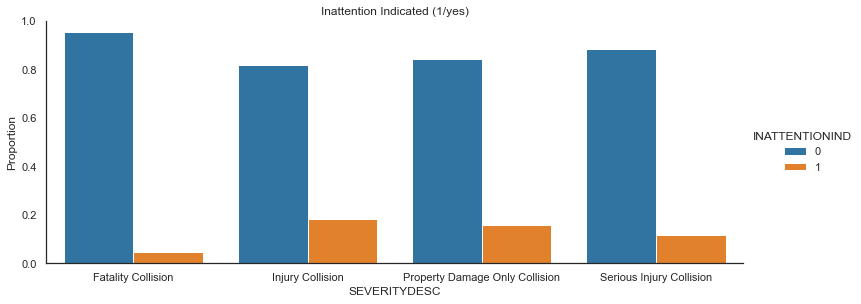

In [43]:
#Plots the data to show the affect of 'UNDERINFL' on 'SEVERITYDESC'

sns.set(font_scale=1)
sns.set_style(style='white')
colors=sns.color_palette('tab10')


ax = sns.catplot(x='SEVERITYDESC',y='Proportion', hue='INATTENTIONIND', kind='bar',height=4.25, aspect=2.5, palette=colors,data= inatt_frame)
ax.set(title = "Inattention Indicated (1/yes)")

## Under the influence 

In [39]:
#Create a usable data frame to create a bar graph:
infl_tableP =df.groupby(by='SEVERITYDESC' , axis=0)['UNDERINFL'].value_counts(dropna=True, normalize=True) #Need to recreate the table now that data is cleaned up


infl_frame = infl_tableP.to_frame() #Create a data frame from the influence/severity proportion table (created in the initial examination)
infl_frame = round(infl_frame,4)    #Round the values of the proportions 

infl_frame.rename(columns = {"UNDERINFL":"Proportion"}, inplace=True)   #Rename the values columns, which contains the proporitons to 'proportions'

infl_frame.reset_index(inplace=True)                #This will push SEVERITYDESC into the columns so it can be used for graphing with seaborn.
infl_frame.drop(axis=0, labels=[8], inplace=True)   #Drop the unknown row.
infl_frame

,SEVERITYDESC,UNDERINFL,Proportion
0,Fatality Collision,0,0.7270
1,Fatality Collision,1,0.2730
2,Injury Collision,0,0.9378
3,Injury Collision,1,0.0622
4,Property Damage Only Collision,0,0.9528
5,Property Damage Only Collision,1,0.0472
6,Serious Injury Collision,0,0.8654
7,Serious Injury Collision,1,0.1346


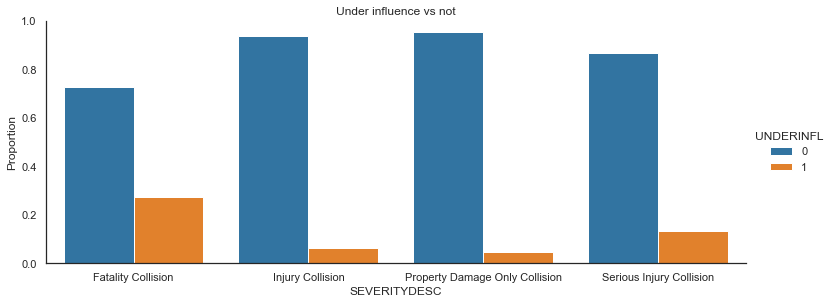

In [90]:
#Plots the data to show the affect of 'UNDERINFL' on 'SEVERITYDESC'

sns.set(font_scale=1)
sns.set_style(style='white')
colors=sns.color_palette('tab10')


ax = sns.catplot(x='SEVERITYDESC',y='Proportion', hue='UNDERINFL', kind='bar',data= infl_frame,height=4.25, aspect=2.5, palette=colors)
ax.set(title = "Under influence vs not")

This bar chart shows a clear relationship between the severity of a collision and being under the influence. We see that injuries make up a greater proportion of the collisions when the driver(s) was under the influence.

[Text(0, 0.5, 'Percent'), Text(0.5, 1.0, 'Speeding affect on severity code')]

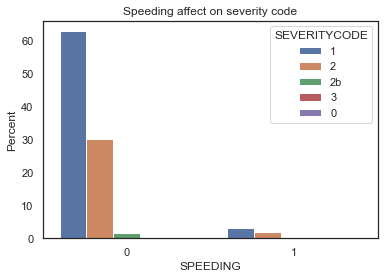

In [82]:
ax = sns.barplot(x='SPEEDING', y="SPEEDING", data=df, hue="SEVERITYCODE", estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent",title="Speeding affect on severity code")

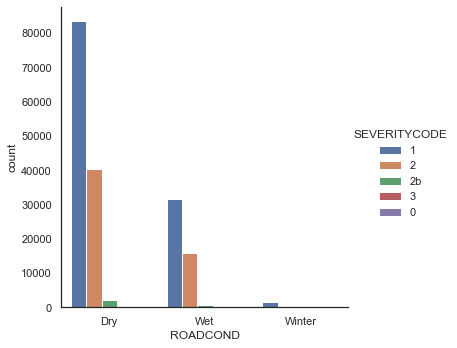

In [83]:
p1 = df.ROADCOND.value_counts()
sns.catplot(x='ROADCOND',kind='count', hue='SEVERITYCODE',data=df)

# Further prep for machine learning

## Severity code and description
Because the insurance company only cares if a crash causes an injury or not, I will combine "Property Damage Only Collision/1" with "Injury Collision/2" and "Serious Injury Collision/2b" with "Fatality/3".

In [178]:
#Values before combining
df['SEVERITYCODE'].value_counts()

1     116494
2      56664
2b      3010
3        337
0          1
Name: SEVERITYCODE, dtype: int64

In [179]:
#Make severity code binary
severitycode_cond_dict = {"1":"0", "2":"1", "2b":"1","3":"1"} 
df['SEVERITYCODE'].replace(to_replace = severitycode_cond_dict,value=None,inplace=True) 

#check the type and print the counts to make sure everything combined properly
df = df.astype({"SEVERITYCODE": "int64"})
print("The data type of severity code is:",df['SEVERITYCODE'].dtypes)
df['SEVERITYCODE'].value_counts()

The data type of severity code is: int64


0    116495
1     60011
Name: SEVERITYCODE, dtype: int64

In [180]:
df.dtypes

SEVERITYCODE       int64
SEVERITYDESC      object
INATTENTIONIND     int64
UNDERINFL          int64
LIGHTCOND         object
ROADCOND          object
SPEEDING           int64
FATALITIES         int64
PEDCOUNT           int64
dtype: object

### Split weather and lighting into binary categories. Change name of data from'df' to 'Feature'

In [181]:
Feature = df[['SEVERITYCODE','INATTENTIONIND','SPEEDING','UNDERINFL','PEDCOUNT']]
Feature = pd.concat([Feature,pd.get_dummies(df['ROADCOND'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(df['LIGHTCOND'])], axis=1)
Feature.head()

,SEVERITYCODE,INATTENTIONIND,SPEEDING,UNDERINFL,PEDCOUNT,Dry,Wet,Winter,Dark,Daylight,Transitional
0,0,0,0,0,0,1,0,0,0,1,0
1,0,1,0,0,0,0,1,0,0,0,1
2,1,0,0,0,0,1,0,0,1,0,0
3,1,0,0,0,1,0,1,0,1,0,0
4,1,0,1,0,0,0,0,1,1,0,0


# Data Modeling - Classification

Now that the data is prepared we'll split the dataset into training and testing data. 
* I'll be using train_test_split on entires with known severity codes.


In [182]:
#train test split
#normalize
#train models

In [183]:
from sklearn import preprocessing  #will be used for machine learning
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

print("done")

done


In [184]:
#Take a random sample from the df for faster testing.

#Feature_svm is a random sample of the dataset specifically for the SVM. SVM calculation time increases at least
#quadratically with data set input.
Feature_svm = Feature.sample(n =35000, random_state=6)
#Feature_test = Feature.sample(n=10000, random_state=10)
#This is equivalent to the df but I use it to help break up affects of code changes
Feature
Feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176506 entries, 0 to 176505
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   SEVERITYCODE    176506 non-null  int64
 1   INATTENTIONIND  176506 non-null  int64
 2   SPEEDING        176506 non-null  int64
 3   UNDERINFL       176506 non-null  int64
 4   PEDCOUNT        176506 non-null  int64
 5   Dry             176506 non-null  uint8
 6   Wet             176506 non-null  uint8
 7   Winter          176506 non-null  uint8
 8   Dark            176506 non-null  uint8
 9   Daylight        176506 non-null  uint8
 10  Transitional    176506 non-null  uint8
dtypes: int64(5), uint8(6)
memory usage: 7.7 MB


In [185]:
X_svm = Feature_svm[["INATTENTIONIND", "UNDERINFL", "SPEEDING",'PEDCOUNT']].values
X = Feature[["INATTENTIONIND", "UNDERINFL", "SPEEDING",'PEDCOUNT']].values #"LIGHTCOND", "ROADCOND" 'Dry','Wet','Winter','Dark','Daylight','Transitional'
X.shape


(176506, 4)

In [186]:
y_svm = Feature_svm[["SEVERITYCODE"]].values.ravel()
y = Feature[["SEVERITYCODE"]].values.ravel() #The input needs to be a flattend series
y[0:5]


array([0, 0, 1, 1, 1], dtype=int64)

Normalize and create train/test split

In [187]:
X_svm = preprocessing.StandardScaler().fit(X_svm).transform(X_svm)
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.44365455, -0.23870299, -0.24150091, -0.21499273],
       [ 2.25400597, -0.23870299, -0.24150091, -0.21499273],
       [-0.44365455, -0.23870299, -0.24150091, -0.21499273],
       [-0.44365455, -0.23870299, -0.24150091,  4.65132004],
       [-0.44365455, -0.23870299,  4.14077111, -0.21499273]])

In [188]:
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_svm, y_svm, test_size=0.2, random_state=4)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (141204, 4) (141204,)
Test set: (35302, 4) (35302,)


### K-Nearest Neighbor

In [212]:
#Initialize an empty vector to hold all of the jaccard scores
KNN_Jac_score = []

#Loop to run through many k values for KNN, 1-10 in this case
for k in range(2,6):
    #Set k value for KNN model 
    ##print(k)
    KNN = KNeighborsClassifier(n_neighbors = k)
    #fit/train model
    KNN.fit(X_train,y_train)
    #'KNN_yhat' will be the predicted value based on test set
    KNN_yhat=KNN.predict(X_test)
    #Get the Jaccard score for this iteration of the for loop  
    KNN_Jac_score.append(round(metrics.accuracy_score(y_test,KNN_yhat),3 ))
    ##print(KNN_Jac_score)

#Print the outputs
print("Model training Jaccard score at:", KNN_Jac_score)
#Print the max score and the k value at which it occurs. K value starts a 1 and index at 0 so I add 1 to index so they match.
print("Model training Max Jaccard score:", max(KNN_Jac_score), "and occurs at k =", KNN_Jac_score.index(max(KNN_Jac_score))+2 )

#Set and train KNN to the best value of k
KNN = KNeighborsClassifier(n_neighbors = KNN_Jac_score.index(max(KNN_Jac_score))+2) #add whatever the starting value of the range is to get the right k val
KNN.fit(X_train,(y_train))
KNN_yhat=KNN.predict(X_test)

#Verify the parameters of KNeighborsClassifier
KNN

Model training Jaccard score at: [0.684, 0.654, 0.689, 0.662]
Model training Max Jaccard score: 0.689 and occurs at k = 4


KNeighborsClassifier(n_neighbors=4)

In [189]:
#Used for testing
k=4 
KNN = KNeighborsClassifier(n_neighbors = k)
#fit/train model
KNN.fit(X_train,y_train)
#'KNN_yhat' will be the predicted value based on training set
KNN_yhat=KNN.predict(X_test)
print('done')   

done


In [190]:
KNN_Jac_score = round(metrics.accuracy_score(y_test,KNN_yhat),3 )
print(KNN_Jac_score)

0.694


In [191]:
KNN_jscore = round( metrics.accuracy_score(y_test, KNN_yhat), 3)
KNN_f1 = "%.3f" % f1_score(y_test, KNN_yhat, average='weighted')

print("KNN Jaccard Score is:", KNN_jscore)
#print("KNN F1-score: %.4f" % f1_score(y_test, KNN_yhat, average='weighted') )
print("\nTest Confusion Matrix: \n", metrics.classification_report(y_test,KNN_yhat))



KNN Jaccard Score is: 0.694

Test Confusion Matrix: 
               precision    recall  f1-score   support

           0       0.69      0.99      0.81     23268
           1       0.86      0.12      0.21     12034

    accuracy                           0.69     35302
   macro avg       0.77      0.56      0.51     35302
weighted avg       0.74      0.69      0.61     35302



### Decision Tree

In [193]:
from sklearn.tree import DecisionTreeClassifier

In [194]:
#Initialize an empty vector to hold all of the jaccard scores
DTC_Jac_score = []

#Loop to run through many k values for DTC, 2-12 in this case
for depth in range(2,10):
    #Set depth value for DTC model 
    ##print(depth)
    DTC = DecisionTreeClassifier(criterion = "entropy", max_depth = depth)
    #fit/train model
    DTC.fit(X_train,y_train)
    #'DTC_yhat' will be the predicted value based on test set
    DTC_yhat=DTC.predict(X_test)
    #Get the Jaccard score for this iteration of the for loop  
    DTC_Jac_score.append(round(metrics.accuracy_score(y_test,DTC_yhat),4 ))
    ##print(DTC_Jac_score)

#Print the outputs
print("Model training Jaccard score at:", DTC_Jac_score)
#Print the max score and the k value at which it occurs. DTC value starts a 2 and index at 0 so I add 2 to index so they match.
print("Model training Max Jaccard score:", max(DTC_Jac_score), "and occurs at depth =", DTC_Jac_score.index(max(DTC_Jac_score))+2 )

#Set and train DTC to the best value of depth
DTC = DecisionTreeClassifier(criterion = "entropy", max_depth = DTC_Jac_score.index(max(DTC_Jac_score))+2) #add whatever the starting value of the range is to get the right k val
DTC.fit(X_train,(y_train))
DTC_yhat=DTC.predict(X_test)

#Verify the parameters of DecisionTreeClassifier
DTC

Model training Jaccard score at: [0.6943, 0.6947, 0.6946, 0.6946, 0.6946, 0.6946, 0.6946, 0.6946]
Model training Max Jaccard score: 0.6947 and occurs at depth = 3


DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [195]:
#Print outputs to see how training set of data performed

DTC_jscore = round( metrics.accuracy_score(y_test, DTC_yhat), 3)
DTC_f1 = "%.3f" % f1_score(y_test, DTC_yhat, average='weighted')

print("Model training Jaccard Score for the decision tree is:", DTC_jscore)
print("Model training Tree Confusion Matrix: \n", metrics.classification_report(y_test,DTC_yhat))

Model training Jaccard Score for the decision tree is: 0.695
Model training Tree Confusion Matrix: 
               precision    recall  f1-score   support

           0       0.69      0.99      0.81     23268
           1       0.84      0.13      0.22     12034

    accuracy                           0.69     35302
   macro avg       0.76      0.56      0.52     35302
weighted avg       0.74      0.69      0.61     35302



### Logistic Regression

In [196]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

LR = LogisticRegression(C=0.01).fit(X_train,y_train)  #default='lbfgs'

LR_yhat = LR.predict(X_test)
LR_yhat_prob = LR.predict_proba(X_test)


print("done")

done


In [197]:
#Print outputs to see how training set of data performed

LogReg_jscore = round(metrics.accuracy_score(y_test,LR_yhat), 3)
LogReg_f1 = "%.3f" % f1_score(y_test, LR_yhat, average='weighted')
LogReg_loss = round(log_loss(y_test, LR_yhat_prob),4)

print("Model training Logistic Regression Jaccard Score:", LogReg_jscore) 
print("Model training LR Confusion Matrix:\n", metrics.classification_report(y_test,LR_yhat))
print("Model training Log Loss score:", LogReg_loss)


Model training Logistic Regression Jaccard Score: 0.694
Model training LR Confusion Matrix:
               precision    recall  f1-score   support

           0       0.68      0.99      0.81     23268
           1       0.90      0.12      0.21     12034

    accuracy                           0.69     35302
   macro avg       0.79      0.55      0.51     35302
weighted avg       0.76      0.69      0.60     35302

Model training Log Loss score: 0.6086


### SVM (sample set only 30,000 or less due to time to run larger sets)

In [198]:
from sklearn import svm as SupportVectorMachine
#kernel can be  one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’
SVM = SupportVectorMachine.SVC(kernel = 'rbf') #SupportVectorClassification method, sigmoid
SVM.fit(X_train_svm,y_train_svm)
SVM_yhat = SVM.predict(X_test_svm)
print("Done")

Done


In [199]:
#Store and print outputs to see how training set of data performed
SVM_jscore = round(metrics.accuracy_score(y_test_svm,SVM_yhat), 3)
SVM_f1 = "%.3f" % f1_score(y_test_svm, SVM_yhat, average='weighted')

print("Model training SVM Jaccard Score:", SVM_jscore) 
print("Model training SVM Confusion Matrix: \n", metrics.classification_report(y_test_svm,SVM_yhat))

#when run with whole data set:
#-Jaccard score is 0.628
#-f1_score is 0.572

Model training SVM Jaccard Score: 0.711
Model training SVM Confusion Matrix: 
               precision    recall  f1-score   support

           0       0.70      1.00      0.82      4738
           1       0.92      0.12      0.21      2262

    accuracy                           0.71      7000
   macro avg       0.81      0.56      0.51      7000
weighted avg       0.77      0.71      0.62      7000



### Summary of results

In [200]:
resultsdf = pd.DataFrame([[KNN_jscore,KNN_f1],[DTC_jscore,DTC_f1],[LogReg_jscore,LogReg_f1,LogReg_loss],[SVM_jscore,SVM_f1] ],
                         columns = ["Jaccard Score","F1-Score","Log Loss Score"], 
                         index = ["KNN","DTC","LogReg","SVM"])

resultsdf

,Jaccard Score,F1-Score,Log Loss Score
KNN,0.694,0.606,NaN
DTC,0.695,0.610,NaN
LogReg,0.694,0.605,0.6086
SVM,0.711,0.624,NaN


Next Steps
* I should probably make some bar charts for severl features
* Visualize classification of KNN?
* I should start writing the report
* Explain why I'm using certain ML algorithms and not others

# No working code beyond here

In [ ]:
#This will need to be clean up BUT it's shows a plot of regular proportion of severity compared to that of
#speeding propotion of severity. We see that speeding collisions are more likely to result in serious injury or death.

severity_speeding_description = ['Property damage','Injury','Unknown','Serious injury', 'Fatality',
                                'Property damage','Injury','Serious injury', 'Fatality','Unknown']
severity_speeding = severity_tableP.append(tempP)

figdims = [14,10]
plt.figure(figsize = figdims)

plt.bar([1,2,3,4,5,6,7,8,9,10], severity_speeding, tick_label = severity_speeding_description)
plt.title("Number of Collisions by Severity  (absolute values)")

In [ ]:
class1 = (temp[0]/sum(temp)) *100
print("Propotion of Speeding Collisions that result in only damages: %.2f" % class1)

class2 = (temp[1]/sum(temp)) *100
print("Propotion of Speeding Collisions that result in injury: %.2f" % class2)

class2b = (temp[2]/sum(temp)) *100
print("Propotion of Speeding Collisions that result in serious: %.2f" % class2b)

class3 = (temp[3]/sum(temp)) *100
print("Propotion of Speeding Collisions that result in death: %.2f" % class3)

In [ ]:
severitydesc_drop_mask = df['SEVERITYDESC'].str.contains("Unknown", na=False)


#Apply the mask to the data frame, keep rows where "Other" is false/doesn't exist
df = df[severitydesc_drop_mask==False]
df.reset_index(drop=True, inplace=True)

In [ ]:

bins = np.linspace(fatality_frame.FATALITIES.min(), fatality_frame.FATALITIES.max(), 10)
g = sns.FacetGrid(fatality_frame, hue="SPEEDING", palette="Set1", col_wrap=1)
g.map(plt.hist, 'FATALITIES', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [179]:
ff0.FATALITIES.value_counts().values

ff0.SPEEDING.unique()
df.SEVERITYDESC.unique()

array(['Property Damage Only Collision', 'Injury Collision',
       'Serious Injury Collision', 'Fatality Collision', 'Unknown'],
      dtype=object)